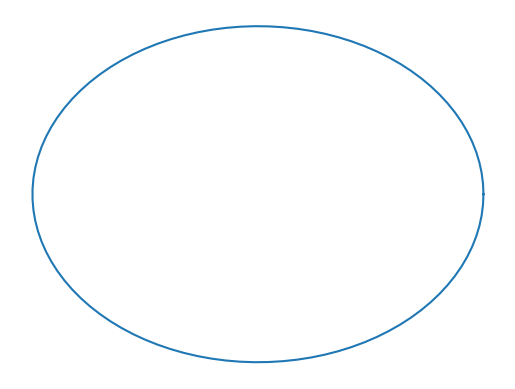

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 원의 중심 좌표와 반지름
x, y, r = 0, 0, 1

# 원 그리기
plt.plot(x + r*np.cos(np.linspace(0, 2*np.pi, 100)), 
         y + r*np.sin(np.linspace(0, 2*np.pi, 100)))

# 축 숨기기
plt.axis('off')

# 그래프 출력
plt.show()


In [1]:
from glob import glob
import os
import shutil
import random

In [2]:
## images 와 labels 폴더 포멧인 경우 random 42로 샘플링 

def sampling(img_path,label_path, des_path, size):
    if img_path[-1] == '/':
        img_path = img_path[:-1]
    if label_path[-1] == '/':
        label_path = label_path[:-1]
    if des_path[-1] == '/':
        des_path = des_path[:-1]
        
    img_source_dir = img_path
    label_source_dir = label_path
    imgs = sorted(glob(img_source_dir + '/*'))
    labels = sorted(glob(label_source_dir + '/*'))
    img_des_path = des_path + '/sampled_images'
    label_des_path = des_path + '/sampled_labels'
    if not os.path.exists(img_des_path):
        os.makedirs(img_des_path)
        print(1)
    if not os.path.exists(label_des_path):
        os.makedirs(label_des_path)
    
    random.seed(42)
    random.shuffle(imgs)
    random.seed(42)
    random.shuffle(labels)

    print(imgs[:3])
    print(labels[:3])
    img_size = int(size * len(imgs))
    label_size = int(size * len(labels))
    imgs = imgs[:img_size]
    labels = labels[:label_size]

    for i in imgs:
        shutil.copy(i,img_des_path)
    for i in labels:
        shutil.copy(i,label_des_path)
    

In [5]:
sampling('../train_dataset/imgs2','../train_dataset/lbls','../train_dataset/aihub',1)

1
['../train_dataset/imgs2/2021-09-07_08-36-00_tue_sunny_out_ye-ma_CD0001_438.jpg', '../train_dataset/imgs2/2021-09-08_21-24-00_wed_sunny_out_se-yk_C12-0306_고2_533.jpg', '../train_dataset/imgs2/2021-09-02_07-54-00_thu_rainy_out_do-sa_C0053-1_312.jpg']
[]


KeyboardInterrupt: 

In [6]:
## ratio

def train_valid_test_split(img_path,label_path,des_path,ratio):
    if img_path[-1] == '/':
        img_path = img_path[:-1]
    if label_path[-1] == '/':
        label_path = label_path[:-1]
    if des_path[-1] == '/':
        des_path = des_path[:-1]

    imgs = sorted(glob(img_path + '/*'))
    random.seed(42)
    random.shuffle(imgs)
    labels = [label_path + '/' + os.path.basename(i)[:-3] + 'txt' for i in imgs]
    
    # labels = sorted(glob(label_path + '/*'))

    list01 = ['train', 'valid', 'test']

    for dirname in list01:
        if not os.path.exists(des_path + '/' + dirname):
            os.mkdir(des_path + '/' + dirname)
    for dirname in list01:
        for dirname2 in ['images', 'labels']:
            print(dirname2)
            if not os.path.exists(des_path + '/' + dirname + '/' + dirname2):
                os.mkdir(des_path + '/' + dirname + '/' + dirname2)

    size = len(imgs)

    

    # random.seed(42)
    # random.shuffle(labels)

    ratio_sum = 0
    for i in ratio:
        ratio_sum += i

    list02 = []
    for idx, ratio in enumerate(ratio):
        
        if len(list02):        
            list02.append(int(ratio / ratio_sum * len(imgs)) + list02[-1])
        else:
            list02.append(int(ratio / ratio_sum * len(imgs)))

        if len(list02) == 2:
            temp_imgs = imgs[list02[-2]:list02[-1]]
            temp_labels = labels[list02[-2]:list02[-1]]

        elif len(list02) == 3:
            temp_imgs = imgs[list02[-2]:]
            temp_labels = labels[list02[-2]:]
            print('test')
        else:
            temp_imgs = imgs[:list02[-1]]
            temp_labels = labels[:list02[-1]]

        for i in range(len(temp_imgs)):
            # print(temp_imgs[i])
            # print(temp_labels[i])
            try:
                shutil.copy(temp_labels[i],des_path + '/' + list01[idx] + '/labels')
                shutil.copy(temp_imgs[i],des_path + '/' + list01[idx] + '/images')
            except:
                pass
        
    print(list02)



In [7]:
train_valid_test_split('../../datasets/other_hatvest/images','../../datasets/other_hatvest/labels','../../datasets/other_hatvest',[18,2,0])

images
labels
images
labels
images
labels
test
[3184, 3537, 3537]
